# Capstone Project

Group: CAP 12

Team members:

1. Jayant Dabas
2. Rebecca Rinehart
3. Eric Zhao

Eric's N-number: N19057054

In [ ]:
# Import packages

import urllib.request
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

In [ ]:
# Seed random generator using Eric's N-number
seed = 19057054
np.random.seed(seed)

## Loading the Data

In [ ]:
url_list = {
  'rmpCapstoneNum.csv': 'https://drive.google.com/uc?export=download&id=1V3CzlVzlbnOWrjySNtyHuXDc7ae_2m0p',
  'rmpCapstoneQual.csv': 'https://drive.google.com/uc?export=download&id=1_O4qXPX-0Ke3k_L7omPYYqNgYX4K7GX5',
  'rmpCapstoneTags.csv': 'https://drive.google.com/uc?export=download&id=1kUewKUyWgqSP9bvjHL4n74WHKiA4VJQn'
}

for key, url in url_list.items():
  print(f'Downloading {key}')
  urllib.request.urlretrieve(url, key)

In [ ]:
def load_data(filename):
  col_names = {
    'rmpCapstoneNum.csv': ['avg_rating', 'avg_difficulty', 'num_ratings', 'is_pepper', 'num_repeat', 'num_online', 'is_male', 'is_female'],
    'rmpCapstoneQual.csv': ['major', 'university', 'state'],
    'rmpCapstoneTags.csv': ["Tough grader", "Good feedback", "Respected", "Lots to read",
             "Participation matters", "Don't skip", "Lots of homework",
             "Inspirational", "Pop quizzes", "Accessible", "So many papers",
             "Clear grading", "Hilarious", "Test heavy", "Graded by few things",
             "Amazing lectures", "Caring", "Extra credit", "Group projects",
             "Lecture heavy"]
  }
  return pd.read_csv(filename, names=col_names[filename])

df_num  = load_data('rmpCapstoneNum.csv')
df_qual = load_data('rmpCapstoneQual.csv')
df_tags = load_data('rmpCapstoneTags.csv')

print(f'df_num: {df_num.shape}')
display(df_num.head())

print(f'df_qual: {df_qual.shape}')
display(df_qual.head())

print(f'df_tags: {df_tags.shape}')
display(df_tags.head())

df_num: (89893, 8)


,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


df_qual: (89893, 3)


,major,university,state
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


df_tags: (89893, 20)


,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Validation and Preprocessing

In [ ]:
# creating column name lists for each table
num_cols = [col for col in df_num.columns]
qual_cols = [col for col in df_qual.columns]
tag_cols = [col for col in df_tags.columns]

**Merge dataframes into one**

In [ ]:
raw_df = pd.concat([df_num, df_qual, df_tags], axis = 1)
raw_df.head()

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_repeat,num_online,is_male,is_female,major,university,state,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1,Criminal Justice,George Mason University,VA,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0,English,Alabama State University,AL,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0,English,University of Kentucky,KY,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0,English,Keiser University,FL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create copy for preprocessing
df = raw_df.copy()

**Handling Null Values**

In [ ]:
df.isnull().sum()

,0
avg_rating,19889
avg_difficulty,19889
num_ratings,19889
is_pepper,19889
num_repeat,77733
num_online,19889
is_male,0
is_female,0
major,19889
university,19889


Because several columns are null but with the same number of nulls, we will begin by dropping the subset of entries where 'avg_rating' is null.

In [ ]:
df = df.dropna(subset = 'avg_rating')

In [ ]:
df.isnull().sum()

,0
avg_rating,0
avg_difficulty,0
num_ratings,0
is_pepper,0
num_repeat,57844
num_online,0
is_male,0
is_female,0
major,0
university,0


Now only num_repeat contains null values. Since a large portion of num_repeats is missing, imputing this column may introduce noise or reduce interpretability.

In [ ]:
# What percentage of num_repeat is null?
pct_null = df['num_repeat'].isnull().sum() / len(df)
print(f'Percent of sample with num_repeat null: {pct_null * 100:.2f}%')

Percent of sample with num_repeat null: 82.63%


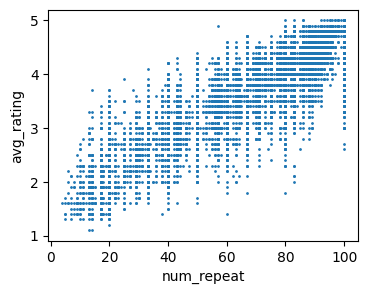

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(df_num.iloc[:, 4], df_num.iloc[:, 0], s=1)
plt.xlabel(num_cols[4])
plt.ylabel(num_cols[0])
plt.show()

We can see a high correlation between avg_rating and num_repeat, so we thought of keeping it, but since more than > 70% of the column is missing, we decided to **drop this column entirely** to prevent any bias where the model focuses too much on this single predictor.

In [ ]:
df = df.drop(columns = 'num_repeat')
# df_v2 = df.dropna(subset=['num_repeat'])

**Addressing Data Quality & Multicollinearity Concerns with Gender**

We investigate the data to find collinearity issues, that might affect the model performance.

After removing rows with invalid gender info 52,089 rows remain.

In [ ]:
# Assumption: The data represents sex assigned at birth. Therefore is_male, is_female can not be equal.
df = df[df['is_male'] != df['is_female']]
print(len(df))
# Check correlation between male and female columns
display(df[['is_male', 'is_female']].corr())

52089


,is_male,is_female
is_male,1.0,-1.0
is_female,-1.0,1.0


Issue
* One-hot encoding (Dummy coding): If the professor is male, it implies that he is not female and vice versa. It shows that we only need one column to describe the other leading to the problem of multi-collinearity.

Solution
* Drop one of the two gender columns

In [ ]:
# Drop the female column
df = df.drop(columns=['is_female'])
print(len(df))

52089


**Removing professors with less than 3 ratings**

In [ ]:
med_num_ratings = np.median(df['num_ratings'])
avg_num_ratings = np.mean(df['num_ratings'])
print('Median number of ratings per professor: ', med_num_ratings)
print('Average number of ratings per professor: ', avg_num_ratings)

for k in [3, 5]:
  k_df = df[df['num_ratings'] >= k]
  size = len(k_df)
  pct_total = size / len(raw_df) * 100
  print(f'Sample size with {k} or more ratings per professor: {size}')
  print(f'Percentage of original sample size: {pct_total:.4f}%')

# filtering for at least 3 ratings
df = df[df['num_ratings'] >= 3]

Median number of ratings per professor:  3.0
Average number of ratings per professor:  5.261494749371268
Sample size with 3 or more ratings per professor: 29726
Percentage of original sample size: 33.0682%
Sample size with 5 or more ratings per professor: 18422
Percentage of original sample size: 20.4933%


In [ ]:
df.reset_index(inplace=True)

We have chosen to filter for (keep) professors with 3 or more ratings, as it retains as much of the data possible while reducing the amount of professors with extreme ratings (1 or 5 due to receiving only 1 or 2 ratings).

## Q1. Activists have asserted that there is a strong gender bias in student evaluations of professors, with male professors enjoying a boost in rating from this bias. While this has been celebrated by ideologues, skeptics have pointed out that this research is of technically poor quality, either due to a low sample size –as small as n = 1 (Mitchell & Martin, 2018), failure to control for confounders such as teaching experience (Centra & Gaubatz, 2000) or obvious p-hacking (MacNell et al., 2015). We would like you to answer the question whether there is evidence of a pro-male gender bias in this dataset. Hint: A significance test is probably required.

In [ ]:
df_1 = df.copy()
print(len(df_1))

29726


In [ ]:
# Split the data
male_ratings = df_1[df_1['is_male'] == 1]['avg_rating']
female_ratings = df_1[df_1['is_male'] == 0]['avg_rating']

ratings = np.sort(df_1['avg_rating'].unique())

male_counts = male_ratings.value_counts(normalize=True).reindex(ratings)
female_counts = female_ratings.value_counts(normalize=True).reindex(ratings)

print(f"male (n={len(male_ratings)}):")
print(f"mean: {male_ratings.mean():.4f}")
print(f"median: {male_ratings.median():.4f}")
print(f"std: {male_ratings.std():.4f}")

print(f"\nfemale (n={len(female_ratings)}):")
print(f"mean: {female_ratings.mean():.4f}")
print(f"median: {female_ratings.median():.4f}")
print(f"std: {female_ratings.std():.4f}")

male (n=15801):
mean: 3.8981
median: 4.2000
std: 0.9557

female (n=13925):
mean: 3.8346
median: 4.1000
std: 1.0068


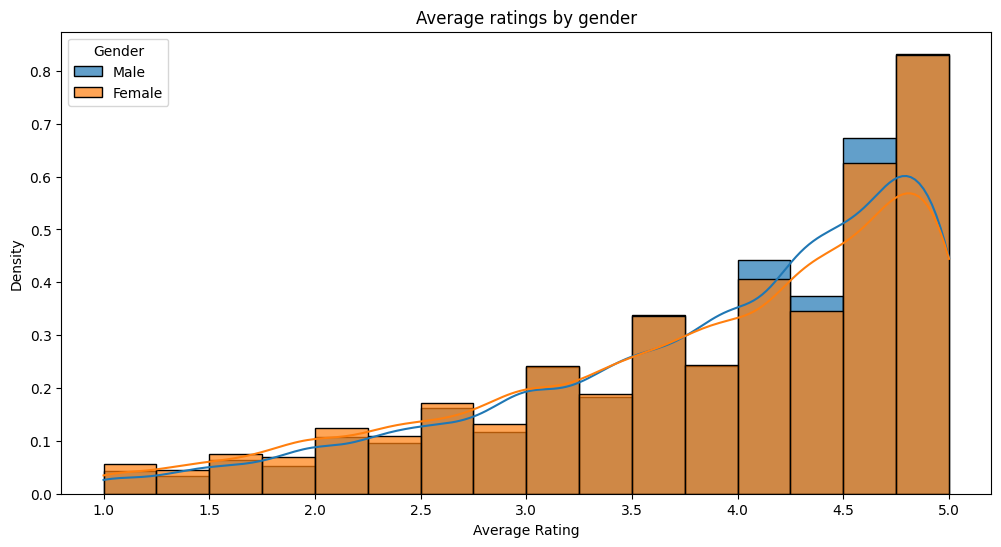

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(male_ratings, stat='density', kde=True, bins=16, alpha=0.7, label='Male')
sns.histplot(female_ratings, stat='density', kde=True, bins=16, alpha=0.7, label='Female')

# Add labels and legend
plt.title('Average ratings by gender')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.legend(title='Gender')

plt.show()

In [ ]:
statistic, p_value = stats.mannwhitneyu(male_ratings, female_ratings, alternative='greater')
print(f"\nu-stat: {statistic}")
print(f"p-value: {p_value}")
print(f"significant at alpha=0.005: {p_value <= 0.005}")


u-stat: 113037784.5
p-value: 2.0622077613712745e-05
significant at alpha=0.005: True


## Q2. Is there a gender difference in the spread (variance/dispersion) of the ratings distribution? Again, it is advisable to consider the statistical significance of any observed gender differences in this spread.

Null Hypothesis (H₀): There is no difference in the spread (variance/dispersion) of the ratings of male and female professors.

In [ ]:
df_2 = df.copy()

# Split the data
male_ratings   = df_2[df_2['is_male'] == 1]['avg_rating']
female_ratings = df_2[df_2['is_male'] == 0]['avg_rating']

In [ ]:
# print cleaned statitics
print('Male ratings: ')
print('Sample size: ', len(male_ratings))
print(f'Variance: {np.var(male_ratings):.4f}')
print(f'\n')

print('Female ratings:')
print('Sample size: ', len(female_ratings))
print(f'Variance: {np.var(female_ratings):.4f}')

Male ratings: 
Sample size:  15801
Variance: 0.9132


Female ratings:
Sample size:  13925
Variance: 1.0137


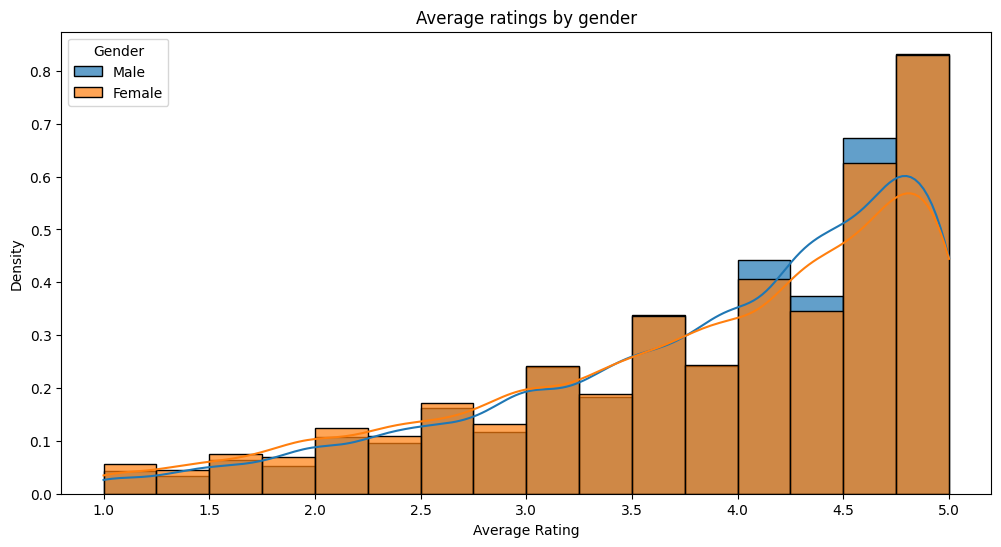

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(male_ratings, stat='density', kde=True, bins=16, alpha=0.7, label='Male')
sns.histplot(female_ratings, stat='density', kde=True, bins=16, alpha=0.7, label='Female')

# Add labels and legend
plt.title('Average ratings by gender')
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.legend(title='Gender')

plt.show()

#### Statistical tests

We consider the following options for the hypothesis testing.

- Welch's t-test
  - Assumption: Assumes variances might differ.
  - Limitation: It tests the **mean**, not the **variance**.

- Levene's Test (Selected)
  - This test is specifically designed to assess whether the variances of two or more groups are equal.
  - It doesn't assume the data follows a normal distribution, which makes it more flexible.
  - Simple to implement *

- Permutation test
  - Tests whether two (or more) groups are different based on a given test statistic (e.g., difference in variances).
  - Shuffle the data labels or group assignments to create a null distribution of the test statistic.



In [ ]:
stat, p_value = stats.levene(male_ratings, female_ratings)
print(f"Levene's Test:")
print(f"\nu-stat: {stat}")
print(f"p-value: {p_value}")

if p_value < 0.005:
    print('\nThe spread of male and female ratings are significantly different.')
else:
    print('\nNo significant difference in the spread of male and female ratings.')

Levene's Test:

u-stat: 47.06328010340384
p-value: 7.007732817297518e-12

The spread of male and female ratings are significantly different.


## Q3. What is the likely size of both of these effects (gender bias in average rating, gender bias in spread of average rating), as estimated from this dataset? Please use 95% confidence and make sure to report each/both.


effect size (cohen's d) of ratings : 0.06479681054271771
95% CI: [0.042010, 0.087584]


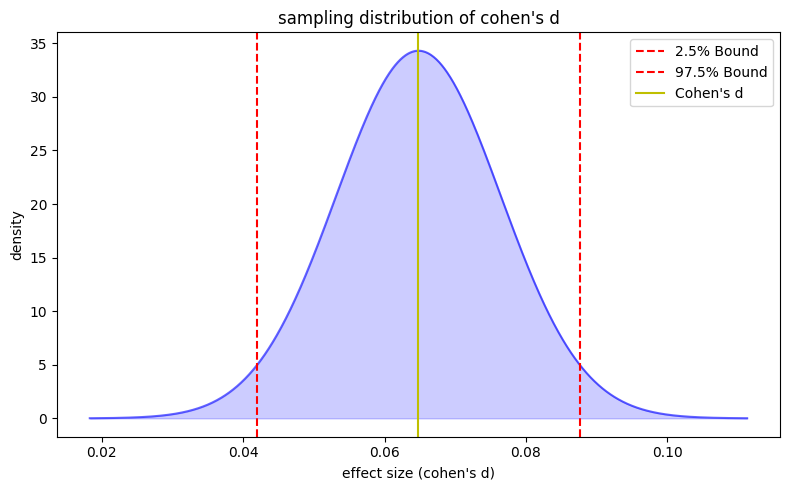

In [ ]:
from scipy.stats import norm

n1, n2 = len(male_ratings), len(female_ratings)
pooled_std = np.sqrt(((n1 - 1) * male_ratings.std()**2 + (n2 - 1) * female_ratings.std()**2) /
                   (n1 + n2 - 2))
effect_size = (male_ratings.mean() - female_ratings.mean()) / pooled_std

print(f"\neffect size (cohen's d) of ratings : {effect_size}")

confidence = 0.95
size_male = len(male_ratings)
size_female = len(female_ratings)
se = np.sqrt((size_male + size_female)/(size_male * size_female) +
             effect_size**2/(2*(size_male + size_female)))
# 95% CI for Cohen's d
z_score = norm.ppf((1 + confidence) / 2)
lower_ci = effect_size - z_score * se
upper_ci = effect_size + z_score * se

print(f'95% CI: [{lower_ci:.6f}, {upper_ci:.6f}]')

plt.figure(figsize=(8, 5))

x = np.linspace(effect_size - 4*se, effect_size + 4*se, 1000)
y = norm.pdf(x, effect_size, se)

plt.plot(x, y, color='b', alpha=0.6)
plt.fill_between(x, y, alpha=0.2, color='b')

plt.axvline(lower_ci, color='r', linestyle='dashed', linewidth=1.5, label='2.5% Bound')
plt.axvline(upper_ci, color='r', linestyle='dashed', linewidth=1.5, label='97.5% Bound')
plt.axvline(effect_size, color='y', linestyle='solid', linewidth=1.5, label='Cohen\'s d')

plt.xlabel('effect size (cohen\'s d)')
plt.ylabel('density')
plt.title('sampling distribution of cohen\'s d')

plt.legend()

plt.tight_layout()
plt.show()

variance effect size (cohen's d): 0.104437
95% CI: [0.081640, 0.127233]


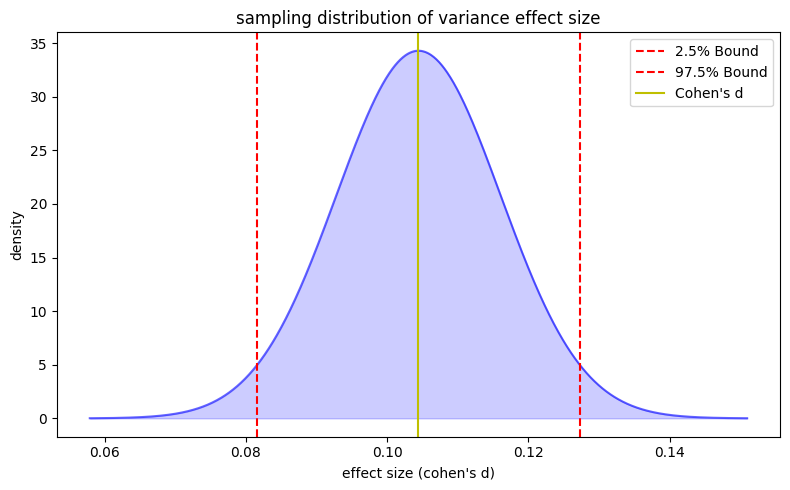

In [ ]:
# cohen's d for variances
var_male = male_ratings.var()
var_female = female_ratings.var()
n1, n2 = len(male_ratings), len(female_ratings)

# pooled standard deviation (of the variances)
pooled_sd = np.sqrt(((n1 - 1) * var_male**2 + (n2 - 1) * var_female**2) /
                   (n1 + n2 - 2))

# cohen's d using variances instead of means
effect_size = abs(var_male - var_female) / pooled_sd

se = np.sqrt((n1 + n2)/(n1 * n2) + effect_size**2/(2*(n1 + n2)))
z_score = norm.ppf((1 + 0.95) / 2)
ci_lower = effect_size - z_score * se
ci_upper = effect_size + z_score * se

print(f"variance effect size (cohen's d): {effect_size:.6f}")
print(f"95% CI: [{ci_lower:.6f}, {ci_upper:.6f}]")

plt.figure(figsize=(8, 5))

x = np.linspace(effect_size - 4*se, effect_size + 4*se, 1000)
y = norm.pdf(x, effect_size, se)

plt.plot(x, y, color='b', alpha=0.6)
plt.fill_between(x, y, alpha=0.2, color='b')

plt.axvline(ci_lower, color='r', linestyle='dashed', linewidth=1.5, label='2.5% Bound')
plt.axvline(ci_upper, color='r', linestyle='dashed', linewidth=1.5, label='97.5% Bound')
plt.axvline(effect_size, color='y', linestyle='solid', linewidth=1.5, label="Cohen's d")

plt.xlabel("effect size (cohen's d)")
plt.ylabel('density')
plt.title('sampling distribution of variance effect size')
plt.legend()
plt.tight_layout()
plt.show()

## Q4. Is there a gender difference in the tags awarded by students? Make sure to test each of the 20 tags for a potential gender difference and report which of them exhibit a statistically significant difference. Comment on the 3 most gendered (lowest p-value) and least gendered (highest p-value) tags.

Null Hypothesis (H₀): There is no difference in the proportion of a given tag awarded to male and female professors.

#### Statistical tests

1. **Chi-square**:
  - Comparing the frequency of tag occurrences between male and female professors.
  - Limitation: Tags are treated as categorical data (e.g., whether a tag was awarded or not), which is not the case

2. **Mann-Whitney U Test** (selected):
  - A non-parametric test for assessing whether two independent samples (male and female tags) come from the same distribution.
  - It tests for differences in central tendency without assuming a normal distribution
  - Suitable for movie ratings, which can be subjective and ordinal in nature.

#### 4.2 Mann Whitney U test

In [ ]:
df_4 = df.copy()

results = []

for tag in tag_cols:
  male_tag_count   = df_4[[tag]][df_4['is_male'] == 1]
  female_tag_count = df_4[[tag]][df_4['is_male'] == 0]
  stat, p_value = stats.mannwhitneyu(male_tag_count, female_tag_count, alternative='two-sided')
  results.append({'tag': tag, 'p-value': p_value[0]})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df['Significant'] = results_df['p-value'] < 0.005

# Sort by p-value
results_df = results_df.sort_values('p-value').reset_index()

# Identify the 3 most gendered and 3 least gendered tags
most_gendered = results_df.head(3)
least_gendered = results_df.tail(3)

# Output results
print('Most Gendered Tags (lowest p-values):')
print(most_gendered)

print('\nLeast Gendered Tags (highest p-values):')
print(least_gendered)

Most Gendered Tags (lowest p-values):
   index               tag        p-value  Significant
0     12         Hilarious  1.212567e-226         True
1     15  Amazing lectures   1.547253e-55         True
2      2         Respected   4.610448e-42         True

Least Gendered Tags (highest p-values):
    index            tag   p-value  Significant
17      0   Tough grader  0.026109        False
18     11  Clear grading  0.083061        False
19      5     Don't skip  0.092432        False


In [ ]:
results_df['p-value'].to_list()

[1.2125666767799394e-226,
 1.547253252969316e-55,
 4.6104481035659086e-42,
 2.3750527552213394e-41,
 1.6064313413052247e-32,
 2.5384323707309247e-23,
 5.1027826474625247e-23,
 6.397896828287387e-16,
 5.5196989229316444e-14,
 3.868185516426563e-13,
 9.43969305519436e-13,
 8.003816380811871e-12,
 2.393833879202988e-11,
 1.6043633954506142e-09,
 3.4655755449291263e-08,
 0.00020852074861993274,
 0.01793430845633228,
 0.02610917380267654,
 0.0830611208378845,
 0.09243159066913915]

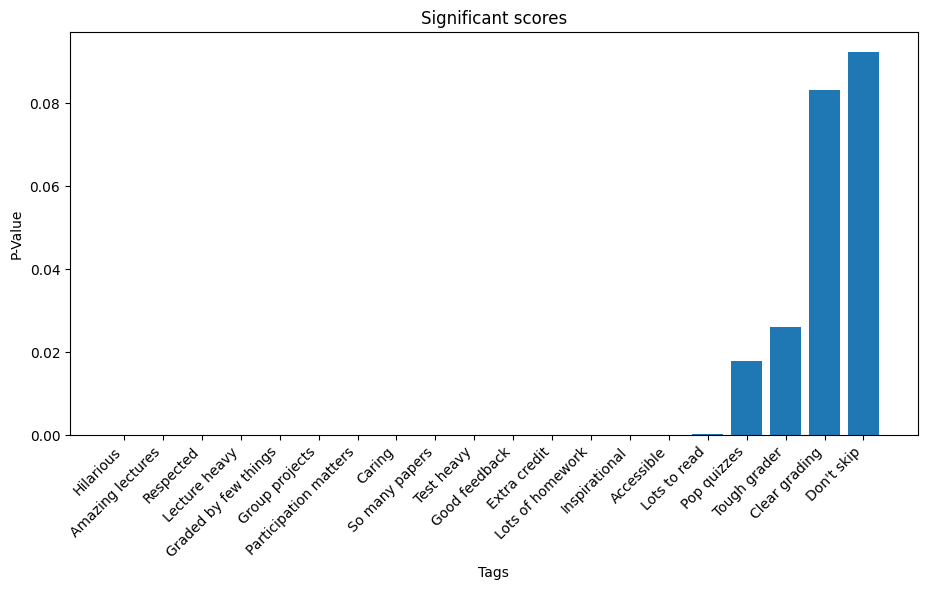

In [ ]:
# Plot the coefficients (betas)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.bar(range(len(results_df)), results_df['p-value'])
plt.title(f'Significant scores')
plt.xlabel('Tags')
plt.ylabel('P-Value')
plt.xticks(range(len(results_df)), labels = results_df['tag'], rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

## Q5. Is there a gender difference in terms of average difficulty? Again, a significance test is indicated.

**Data Cleaning**

In [ ]:
df_5 = df.copy()

# Split the data into male and female ratings
male_difficulty = df_5[df_5['is_male'] == 1]['avg_difficulty']
female_difficulty = df_5[df_5['is_male'] == 0]['avg_difficulty']

# print cleaned statitics
print('Male difficulty: ')
print('Sample size: ', len(male_difficulty))
print(f'Mean: {np.mean(male_difficulty):.4f}')
print(f'Standard deviation: {np.std(male_difficulty):.4f}')
print(f'\n')

print('Male difficulty:')
print('Sample size: ', len(female_difficulty))
print(f'Mean: {np.mean(female_difficulty):.4f}')
print(f'Standard deviation: {np.std(female_difficulty):.4f}')

Male difficulty: 
Sample size:  15801
Mean: 2.8841
Standard deviation: 0.8530


Male difficulty:
Sample size:  13925
Mean: 2.8827
Standard deviation: 0.8509


**Visualization**

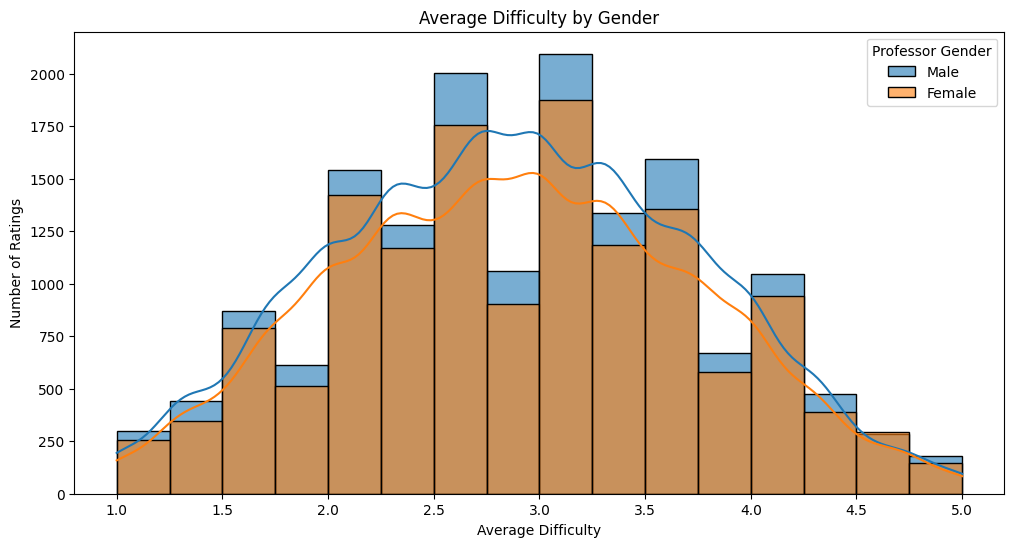

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(male_difficulty, kde=True, bins=16, alpha=0.6, label='Male')
sns.histplot(female_difficulty, kde=True, bins=16, alpha=0.6, label='Female')

plt.title('Average Difficulty by Gender')
plt.xlabel('Average Difficulty')
plt.ylabel('Number of Ratings')
plt.legend(title='Professor Gender')

plt.show()

**Comparing variances**

Because the data appears to be normally distributed, I could employ an F-test to determine if the variances are different. Here, I will use Levene's test; it is more robust than F-test, as it does not require assumption of normality. F-test is more sensitive to normality violations.

In [ ]:
levene_stat, levene_pval = stats.levene(male_difficulty, female_difficulty)

print('Levene\'s test: ')
print(f'Statistic: {levene_stat:.4f}')
print(f'p-value: {levene_pval:.4f}')

Levene's test: 
Statistic: 0.0927
p-value: 0.7607


H0: The average difficulties for male and female professors have equal variances.
H1: The average difficulties for male and female professors have unequal variances.
Because p-value > 0.005, we retain the null hypothesis and conclude that the variances are equal.

**Independent Samples t-test**

Because the difficulty score was presented as an average in the original dataset, we are assuming that difficulty can be reduced to its sample mean.

We are comparing 2 sample means, do not know the population parameters, no large inter-individual variability, and similar variances. Therefore, we will use an independent samples t-test.

In [ ]:
statistic, pval = stats.ttest_ind(male_difficulty, female_difficulty)
print('t test statistic: ', statistic)
print('p-value: ', pval)
print('p-value < alpha = 0.005?', pval< 0.005)
print('Findings: The average difficulty scores of male and female professors are not significantly different. The results are consistent with chance.')
print('Conclusion: There is no gender difference in average difficulty.')

t test statistic:  0.14195532904551686
p-value:  0.8871162526038965
p-value < alpha = 0.005? False
Findings: The average difficulty scores of male and female professors are not significantly different. The results are consistent with chance.
Conclusion: There is no gender difference in average difficulty.


## Q6. Please quantify the likely size of this effect at 95% confidence.

**Calculate effect size (Cohen's d) with 95% confidence intervals**

In [ ]:
mean_male = np.mean(male_difficulty)
std_male = np.std(male_difficulty)

mean_female = np.mean(female_difficulty)
std_female = np.std(female_difficulty)

numerator = abs(mean_male - mean_female)
denominator = np.sqrt((std_male**2 + std_female**2) / 2) # pooled sd
d = numerator/denominator

print(f'Effect size (Cohen\'s d): {d:.6f}')

Effect size (Cohen's d): 0.001650


In [ ]:
confidence = 0.95 #confidence level at 95%
size_male = len(male_difficulty)
size_female = len(female_difficulty)

# calculate standard error of d
se = np.sqrt((size_male + size_female)/(size_male * size_female) + d**2/(2*(size_male + size_female)))

# calculate z score and confidence intervals
z_score = stats.norm.ppf((1 + confidence) / 2)
lower_cb = d - z_score * se
upper_cb = d + z_score * se

print(f'95% confidence interval: [{lower_cb:.5f}, {upper_cb:.5f}]')

95% confidence interval: [-0.02113, 0.02443]


Findings: We estimate the effect size to be 0.001650 with 95% confidence that the true effect lies in the interval of [-0.02113, 0.02443].

Interpretation: With an effect size this small, the distribution of average difficulty between male and female professors nearly overlaps. The average difference in average difficulty is 0.165% of a standard deviation.

**Visualization**

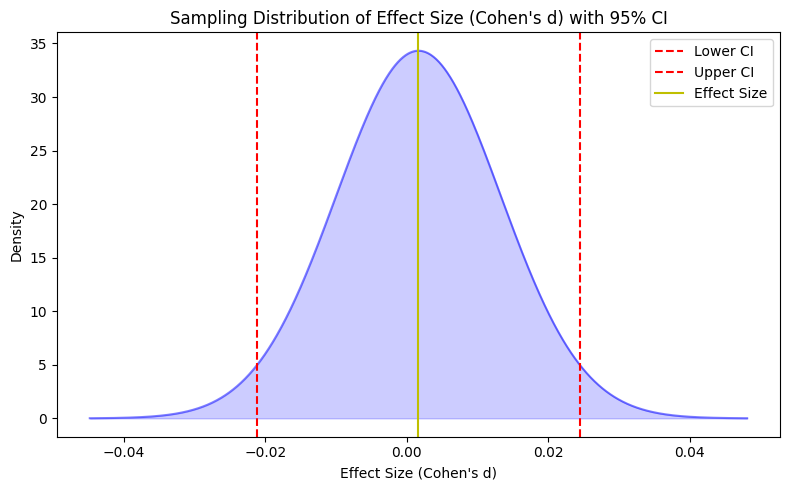

In [ ]:
# Create the plot
plt.figure(figsize=(8, 5))

x = np.linspace(d - 4*se, d + 4*se, 1000)
y = stats.norm.pdf(x, d, se)

plt.plot(x, y, color = 'b', alpha = 0.5)
plt.fill_between(x, y, alpha = 0.2, color = 'b')

plt.axvline(lower_cb, color = 'r', linestyle = 'dashed', linewidth = 1.5, label = 'Lower CI')
plt.axvline(upper_cb, color = 'r', linestyle = 'dashed', linewidth = 1.5, label = 'Upper CI')
plt.axvline(d, color = 'y', linestyle = 'solid', linewidth = 1.5, label = 'Effect Size')

plt.xlabel('Effect Size (Cohen\'s d)')
plt.ylabel('Density')
plt.title('Sampling Distribution of Effect Size (Cohen\'s d) with 95% CI')

plt.legend()
plt.tight_layout()
plt.show()

## Q7. Build a regression model predicting average rating from all numerical predictors (the ones in the rmpCapstoneNum.csv) file. Make sure to include the R2and RMSE of this model. Which of these factors is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns

### 7.1 Look for numerical predictors

By previewing the data for rmpCapstoneNum.csv, we observe that it contains float and boolean (represented as int) values, which act as numerical predictors.

In [ ]:
# Preview dataset
col_names = num_cols.copy()
col_names.remove('num_repeat')
col_names.remove('is_female')

df_7 = df.copy()[col_names]
display(df_7)
display(df_7.info())

,avg_rating,avg_difficulty,num_ratings,is_pepper,num_online,is_male
0,3.2,3.0,4.0,0.0,0.0,1
1,3.5,3.3,22.0,0.0,7.0,1
2,4.2,1.7,3.0,1.0,0.0,0
3,2.6,4.1,10.0,0.0,0.0,1
4,3.7,2.7,3.0,0.0,1.0,1
...,...,...,...,...,...,...
29721,4.4,3.6,14.0,1.0,0.0,0
29722,3.8,2.8,6.0,0.0,0.0,0
29723,3.6,3.4,10.0,0.0,1.0,1
29724,3.9,3.8,4.0,1.0,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29726 entries, 0 to 29725
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avg_rating      29726 non-null  float64
 1   avg_difficulty  29726 non-null  float64
 2   num_ratings     29726 non-null  float64
 3   is_pepper       29726 non-null  float64
 4   num_online      29726 non-null  float64
 5   is_male         29726 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.4 MB


None

### 7.3 Data Preprocessing

In [ ]:
# Count number of null values for each column
df_7.isnull().sum()

,0
avg_rating,0
avg_difficulty,0
num_ratings,0
is_pepper,0
num_online,0
is_male,0


In [ ]:
# Step 1: Separate data
X = df_7.drop(columns=['avg_rating'])
y = df_7['avg_rating']

# Step 2: Train-Test Split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

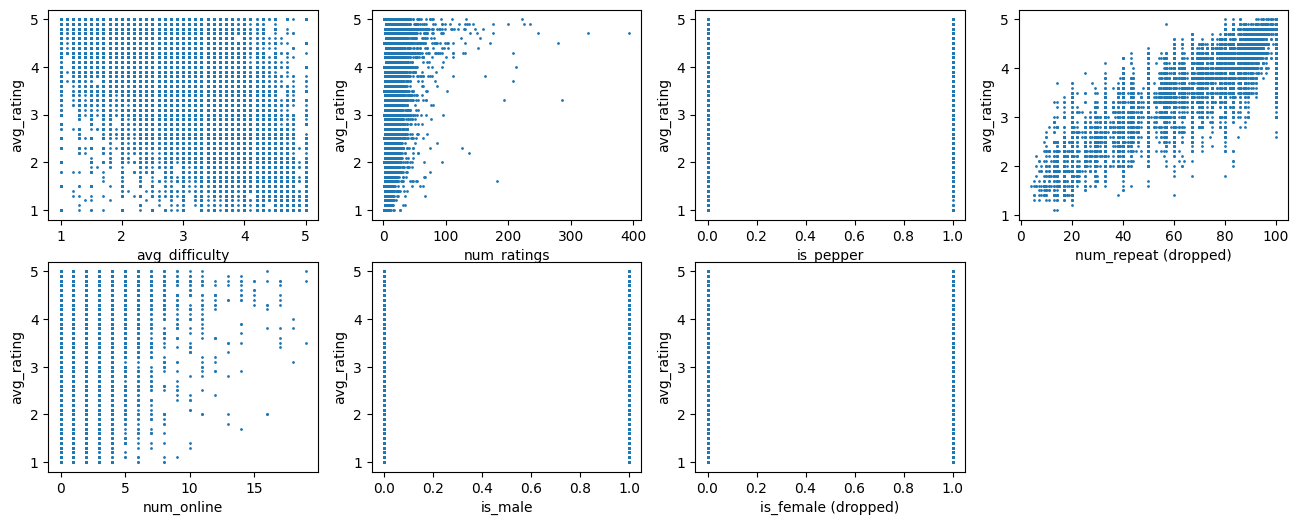

In [ ]:
plt.figure(figsize=(16, 6))
for i in range(1,8):
  plt.subplot(2, 4, i)
  plt.scatter(df_num.iloc[:, i], df_num.iloc[:, 0], s=1)
  plt.xlabel(num_cols[i]+(' (dropped)' if num_cols[i] not in col_names else ''))
  plt.ylabel(num_cols[0])
plt.savefig('q7_scatter_plots.png', dpi=300)
plt.show()

### 7.4 Model Training - Ridge Regression

We train a Ridge Regression model using GridSearchCV on a large range of alphas.

In [ ]:
param = {
  'alpha': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1, 2, 5, 10, 15, 20, 25, 30, 50, 100]
}

model = Ridge(random_state=seed)

grid_search = GridSearchCV(model, param_grid=param)
grid_search.fit(X_train_scaled, y_train)

print(f'Best param : {grid_search.best_params_}')
print(f'Best score : {grid_search.best_score_}')

betas = grid_search.best_estimator_.coef_
print(f'Betas: {betas}')

Best param : {'alpha': 10}
Best score : 0.43356029225893905
Betas: [-0.51699854  0.02261885  0.28848592 -0.01834315  0.03700337]


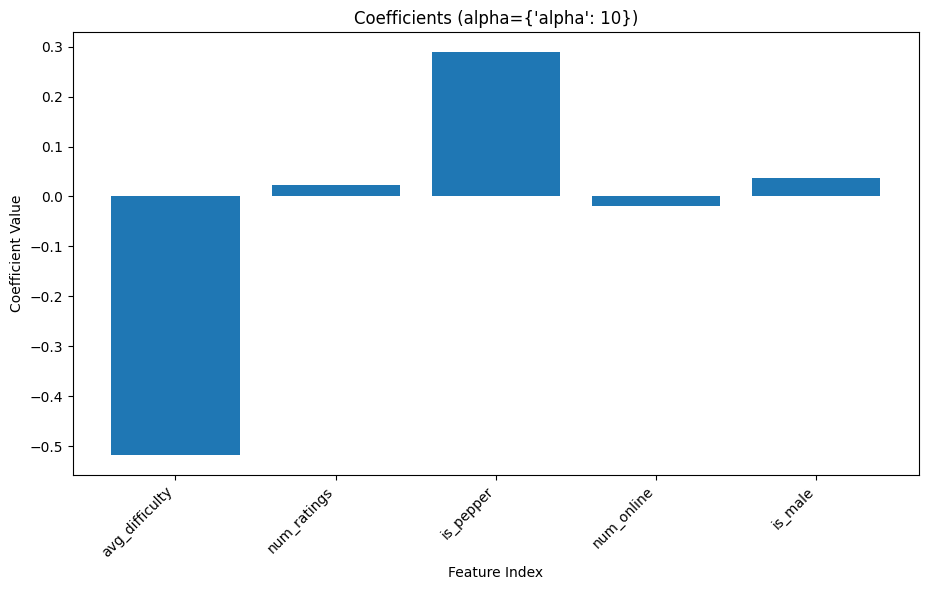

In [ ]:
# Plot the coefficients (betas)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.bar(range(len(betas)), betas)
plt.title(f'Coefficients (alpha={grid_search.best_params_})')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(betas)), labels = X.columns, rotation = 45, ha = 'right')

plt.tight_layout()
plt.savefig('q7_betas.png', dpi=300)
plt.show()

### 7.5 Model Evaluation

In [ ]:
best_model = grid_search.best_estimator_

# R^2and RMSE of this model
y_pred = best_model.predict(X_val_scaled)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f'R^2: {r2}')
print(f'RMSE: {rmse}')

R^2: 0.4226357541309209
RMSE: 0.7496184219095716


## Q8. Build a regression model predicting average ratings from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns. Also comment on how this model compares to the previous one.

**Creating dataframe with necessary columns**

In [ ]:
df_8 = pd.concat([
    df[['num_ratings', 'avg_rating']],
    df[tag_cols]], axis = 1)

df_8.shape
df_8

,num_ratings,avg_rating,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,4.0,3.2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22.0,3.5,8,13,1,3,2,3,2,1,0,3,0,7,3,0,0,0,3,0,1,3
2,3.0,4.2,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,10.0,2.6,4,3,0,0,2,0,1,1,0,0,0,0,0,0,0,1,1,0,5,1
4,3.0,3.7,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29721,14.0,4.4,4,1,1,0,1,5,3,0,0,2,0,3,3,3,1,4,2,3,0,1
29722,6.0,3.8,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,2,3,1,4
29723,10.0,3.6,3,0,1,0,0,1,6,1,1,3,0,1,2,2,0,1,3,0,0,1
29724,4.0,3.9,2,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0


**Normalize tag numbers**

To account for professors with numbers of ratings, we will normalize by calculating the proportion of that professor's ratings per tag, rather than using the raw number of ratings.

We cannot assume that num_ratings is the same as the sum of ratings over each row. To confirm this:

In [ ]:
total_ratings = df_8[tag_cols].sum(axis = 1)

df_8['num_ratings'] == total_ratings

,0
0,False
1,False
2,False
3,False
4,True
...,...
29721,False
29722,False
29723,False
29724,False


They are not the same, so num_ratings cannot be used to normalize the tags. We must use the sum over each row.

In [ ]:
# avoid division by zero - replace 0 sums with 1
total_ratings = total_ratings.replace(0, 1)

for col in tag_cols:
    df_8[col] = df[col] / total_ratings

# verify that normalized values add up to either 1 or 0 per row
df_8['sum over row'] = df_8[tag_cols].sum(axis = 1)
print(df_8[~df_8['sum over row'].round(10).isin([0.0, 1.0])]['sum over row']) # print any rows where sum is not 0 or 1

df_8 = df_8.drop(columns = 'sum over row') # remove column after verifying
df_8.head()

Series([], Name: sum over row, dtype: float64)


,num_ratings,avg_rating,Tough grader,Good feedback,Respected,Lots to read,Participation matters,Don't skip,Lots of homework,Inspirational,Pop quizzes,Accessible,So many papers,Clear grading,Hilarious,Test heavy,Graded by few things,Amazing lectures,Caring,Extra credit,Group projects,Lecture heavy
0,4.0,3.2,0.166667,0.083333,0.166667,0.083333,0.000000,0.333333,0.166667,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,22.0,3.5,0.150943,0.245283,0.018868,0.056604,0.037736,0.056604,0.037736,0.018868,0.0,0.056604,0.0,0.132075,0.056604,0.0,0.0,0.000000,0.056604,0.0,0.018868,0.056604
2,3.0,4.2,0.000000,0.400000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.200000,0.0,0.000000,0.000000
3,10.0,2.6,0.210526,0.157895,0.000000,0.000000,0.105263,0.000000,0.052632,0.052632,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.052632,0.052632,0.0,0.263158,0.052632
4,3.0,3.7,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


**Ridge Regression with Cross Validation**

In [ ]:
# split data into predictors and target
X = df_8.drop(columns=['avg_rating', 'num_ratings'])
y = df_8['avg_rating']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define hyperparameter tuning grid
param_grid = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]  # Reduced for efficiency
}

# GridSearchCV with R2 scoring
ridge_cv = GridSearchCV(
    Ridge(random_state=seed),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1  # Use all CPU cores
)
ridge_cv.fit(X_train_scaled, y_train)

# Get results
print(f'Best alpha: {ridge_cv.best_params_}')
print(f'Best CV R2 score: {ridge_cv.best_score_:.4f}')

# Get coefficients
betas = ridge_cv.best_estimator_.coef_

feature_importance = pd.DataFrame({
    'tag': tag_cols,
    'coefficient': np.abs(ridge_cv.best_estimator_.coef_),
})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)

print("\nfeature importance of tags:")
print(feature_importance.head(10).to_string(index=False))


# Make predictions on test set
y_pred = ridge_cv.best_estimator_.predict(X_test_scaled)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('\nModel Performance Metrics on Test Set:')
print(f'R2 score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

Best alpha: {'alpha': 10}
Best CV R2 score: 0.6465

feature importance of tags:
                  tag  coefficient
        Good feedback     0.285128
            Respected     0.227060
     Amazing lectures     0.221580
               Caring     0.214956
         Tough grader     0.190319
            Hilarious     0.186311
        Clear grading     0.168218
        Inspirational     0.138102
         Extra credit     0.124713
Participation matters     0.112229

Model Performance Metrics on Test Set:
R2 score: 0.6518
RMSE: 0.5821


**Visualization of the Coefficients**

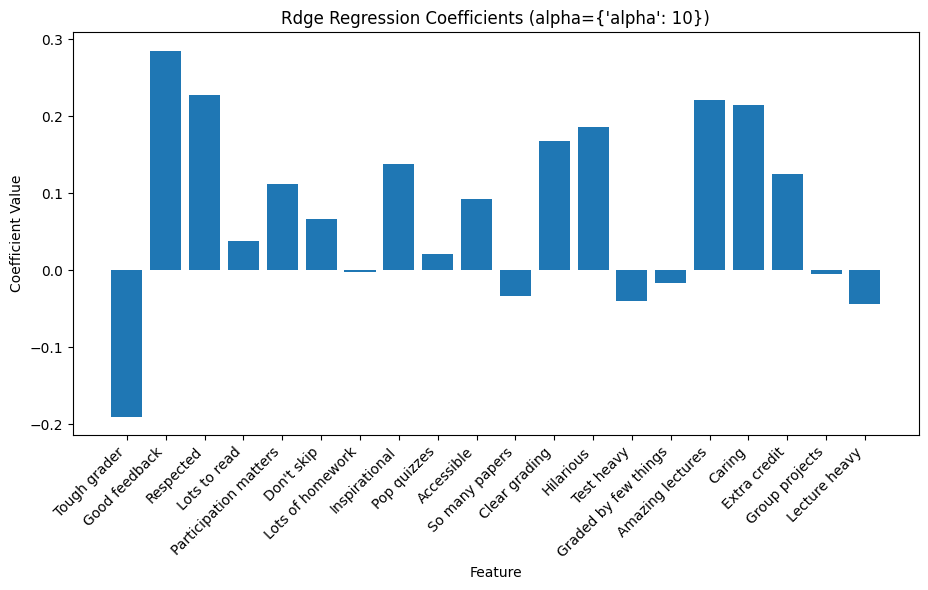

In [ ]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 2)
plt.bar(range(len(betas)), betas)
plt.title(f'Rdge Regression Coefficients (alpha={ridge_cv.best_params_})')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(betas)), labels = tag_cols, rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

The "Good feedback" tag is most strongly predictive of average rating, due to it having the largest absolute coefficient value.

## Q.9 Build a regression model predicting average difficulty from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average difficulty? Hint: Make sure to address collinearity concern

R²: 0.480534
RMSE: 0.619117
best alpha: 10

feature importance of tags:
          tag  coefficient
 Tough grader     0.342115
Clear grading     0.106576
    Hilarious     0.103642
       Caring     0.091580
   Test heavy     0.089608
 Extra credit     0.085046
    Respected     0.066918
   Accessible     0.065754
   Don't skip     0.062027
 Lots to read     0.059797


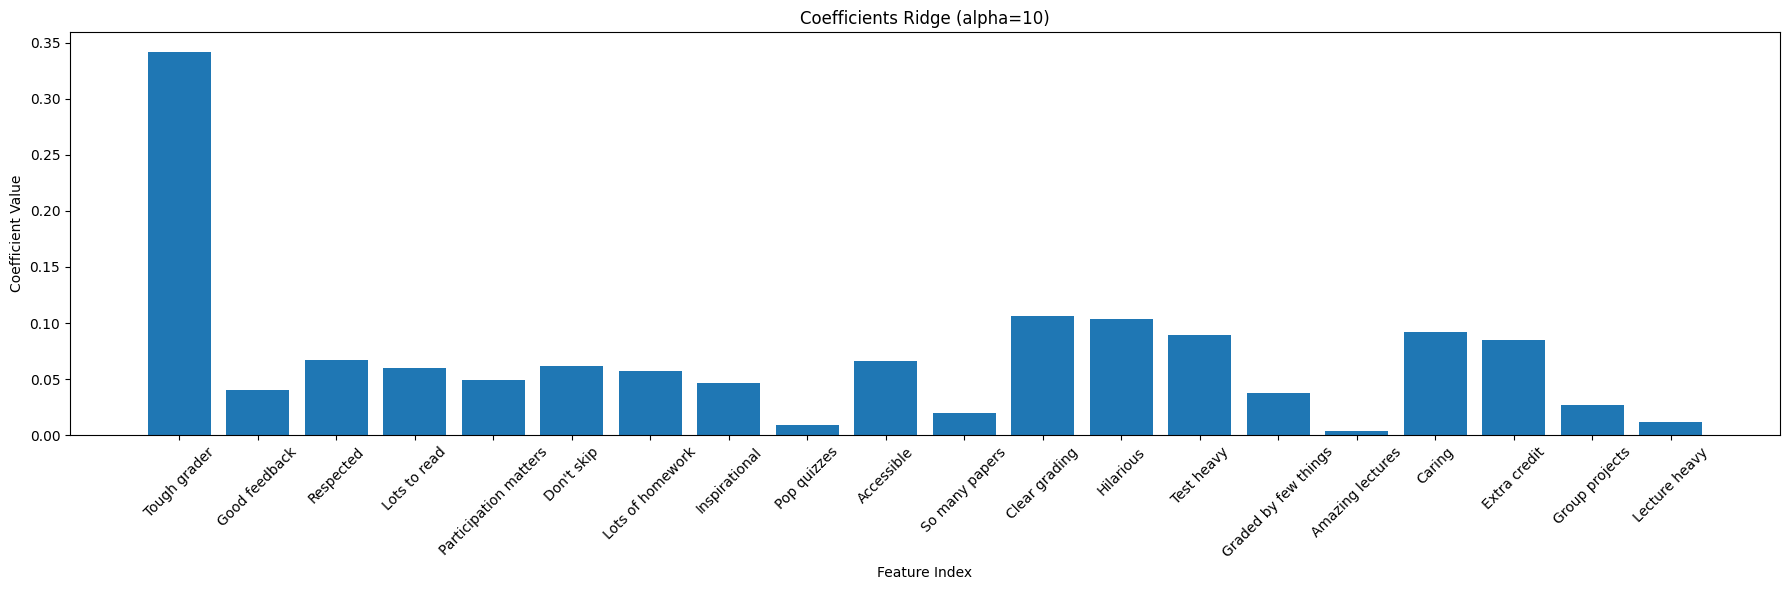

In [ ]:
from sklearn.linear_model import RidgeCV

df_9 = df.copy()
total_ratings = df_9[tag_cols].sum(axis=1)
total_ratings = total_ratings.replace(0, 1)  # Avoid division by zero
for tag in tag_cols:
    df_9[tag] = df_9[tag] / total_ratings

X = df_9[tag_cols]
y = df_9['avg_difficulty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ridge regression to handle collinearity
alphas = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1.0, 10, 11, 15, 20, 100, 1000]
ridge_train_mse = []
ridge_test_mse = []

# perform ridge regression
for a in alphas:
    ridge_model = Ridge(alpha=a)
    ridge_model.fit(X_train_scaled, y_train)
    y_train_pred = ridge_model.predict(X_train_scaled)
    y_test_pred = ridge_model.predict(X_test_scaled)

    ridge_train_mse.append(mean_squared_error(y_train, y_train_pred))
    ridge_test_mse.append(mean_squared_error(y_test, y_test_pred))

best_alpha = alphas[ridge_test_mse.index(min(ridge_test_mse))]
'''
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_train_mse, label='Training MSE', marker='o')
plt.plot(alphas, ridge_test_mse, label='Testing MSE', marker='o')
plt.xscale('log')  # Log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Ridge Regularization on MSE')
plt.legend()
plt.grid(True)
plt.show()
'''

ridge_model = RidgeCV(alphas=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

feature_importance = pd.DataFrame({
    'tag': tag_cols,
    'coefficient': np.abs(ridge_model.coef_),
})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)

print(f"R²: {r2:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"best alpha: {np.abs(ridge_model.alpha_)}")

print("\nfeature importance of tags:")
print(feature_importance.head(10).to_string(index=False))

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
betas_ridge = np.abs(ridge_model.coef_)

plt.figure(figsize=(18, 6))
plt.bar(X.columns, betas_ridge)
plt.title(f'Coefficients Ridge (alpha={best_alpha})')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Q10. Build a classification model that predicts whether a professor receives a “pepper” from all available factors(both tags and numerical). Make sure to include model quality metrics such as AU(RO)C and also address class imbalance concerns.

In [ ]:
df_10 = df.copy()

# drop qualitative columns
df_10 = df_10.drop(columns = qual_cols)

**Visualizing Class Size**

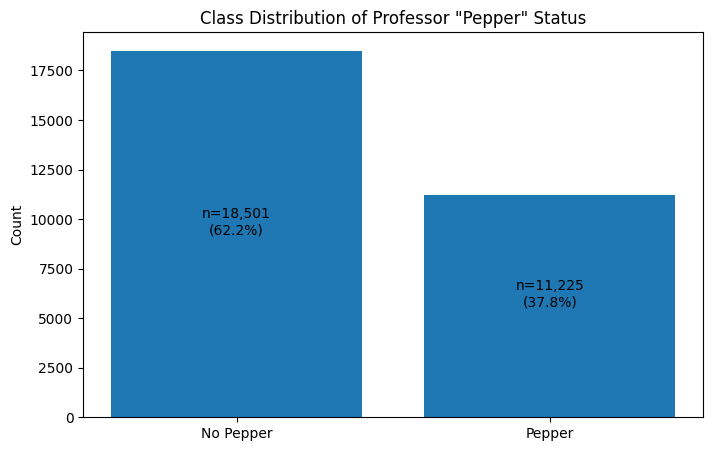

In [ ]:
n_pepper = (df_10['is_pepper'] == 1).sum()
n_no_pepper = (df_10['is_pepper'] == 0).sum()

plt.figure(figsize=(8, 5))
plt.bar(['No Pepper', 'Pepper'], [n_no_pepper, n_pepper])
plt.title('Class Distribution of Professor "Pepper" Status')
plt.ylabel('Count')
text_no_pepper = f'n={n_no_pepper:,}\n({n_no_pepper/len(df):.1%})'
text_pepper = f'n={n_pepper:,}\n({n_pepper/len(df):.1%})'
plt.text('No Pepper', n_no_pepper/2, text_no_pepper, ha='center')
plt.text('Pepper', n_pepper/2, text_pepper, ha='center')
plt.show()

From visualizing the target classes, we can see that there is class imbalance. To address this, we will use class_weight strategies when hyperparameter tuning.

**Logistic Regression**

Best param: {'C': 0.01, 'class_weight': {0: 1, 1: 3}, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV ROC-AUC score: 0.7781680867518517

feature importance of tags:
         feature  coefficient
      avg_rating     1.001201
Amazing lectures     0.278233
   Inspirational     0.241443
       Hilarious     0.186084
   Good feedback     0.130118
  avg_difficulty     0.119634
           index     0.118637
          Caring     0.118098
         is_male     0.094683
Lots of homework     0.083183

Test Set ROC-AUC Score: 0.7870


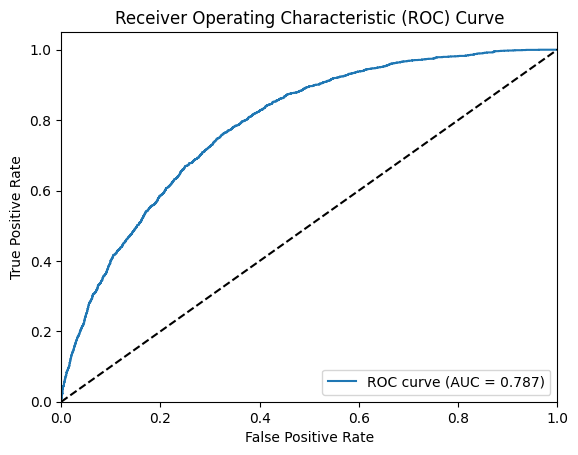

In [ ]:
# split data into predictors and tags
X = df_10.drop(columns = 'is_pepper')
y = df_10['is_pepper']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define hyperparameter tuning grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],  # Inverse of regularization strength
    'class_weight': [
        'balanced',  # Automatically adjust weights inversely proportional to class frequencies
        {0: 1, 1: 2},  # Manual weight ratio of 1:2 (no pepper : pepper)
        {0: 1, 1: 3}
    ],
    'penalty': ['l2'],  # default
    'solver': ['lbfgs', # default
               'newton-cholesky',  # good when n_samples >> n_features
               'liblinear'
                ],
}
lr_cv = GridSearchCV(LogisticRegression(random_state = seed), param_grid, cv = 5, scoring = 'roc_auc', n_jobs = 1)
lr_cv.fit(X_train_scaled, y_train)

# get best params and fit regression
print(f'Best param: {lr_cv.best_params_}')
print(f'Best CV ROC-AUC score: {lr_cv.best_score_}') # cv score average across all 5 folds

betas = lr_cv.best_estimator_.coef_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': np.abs(betas[0]),
})
feature_importance = feature_importance.sort_values('coefficient', ascending=False)

print("\nfeature importance of tags:")
print(feature_importance.head(10).to_string(index=False))

# Get predictions and probabilities
y_pred_proba = lr_cv.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f'\nTest Set ROC-AUC Score: {roc_auc:.4f}')

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

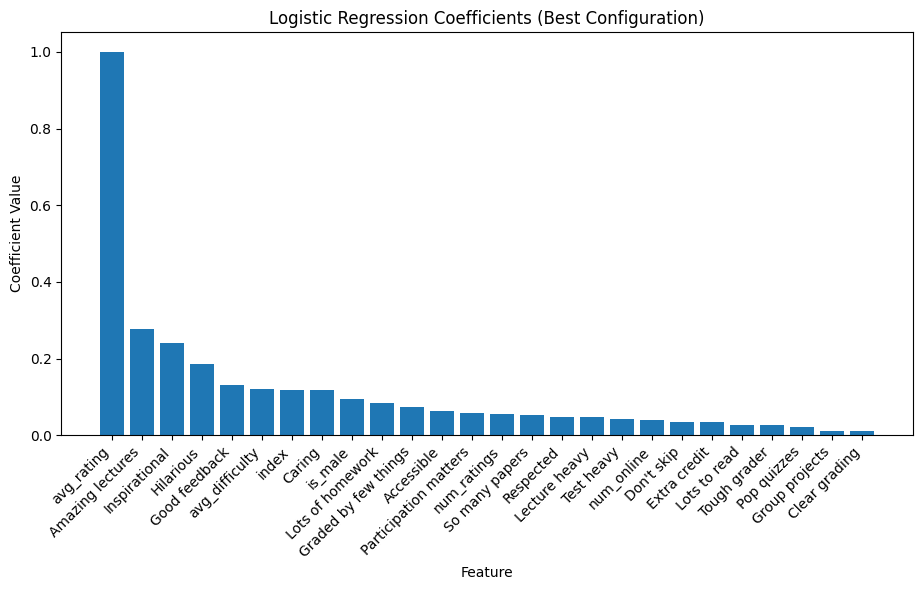

In [ ]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 2)
plt.bar(range(len(feature_importance)), feature_importance['coefficient'])
plt.title(f'Logistic Regression Coefficients (Best Configuration)')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(betas[0])), labels = feature_importance['feature'], rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

## Extra Credit: Do professors from different regions (Northeast, Midwest, South, West, Non-US) and outside of the United States have a difference in difficulty ratings?

In [ ]:
df_ec = df.copy()


kw h-test results:
h-statistic: 68.46059454966885
p-value: 4.796087385598109e-14

median difficulty by region:
region
Midwest      3.0
Non-US       3.0
Northeast    2.9
South        2.8
West         2.9
Name: avg_difficulty, dtype: float64

sample size by region:
region
South        10483
West          7520
Northeast     5244
Midwest       4959
Non-US        1520
Name: count, dtype: int64


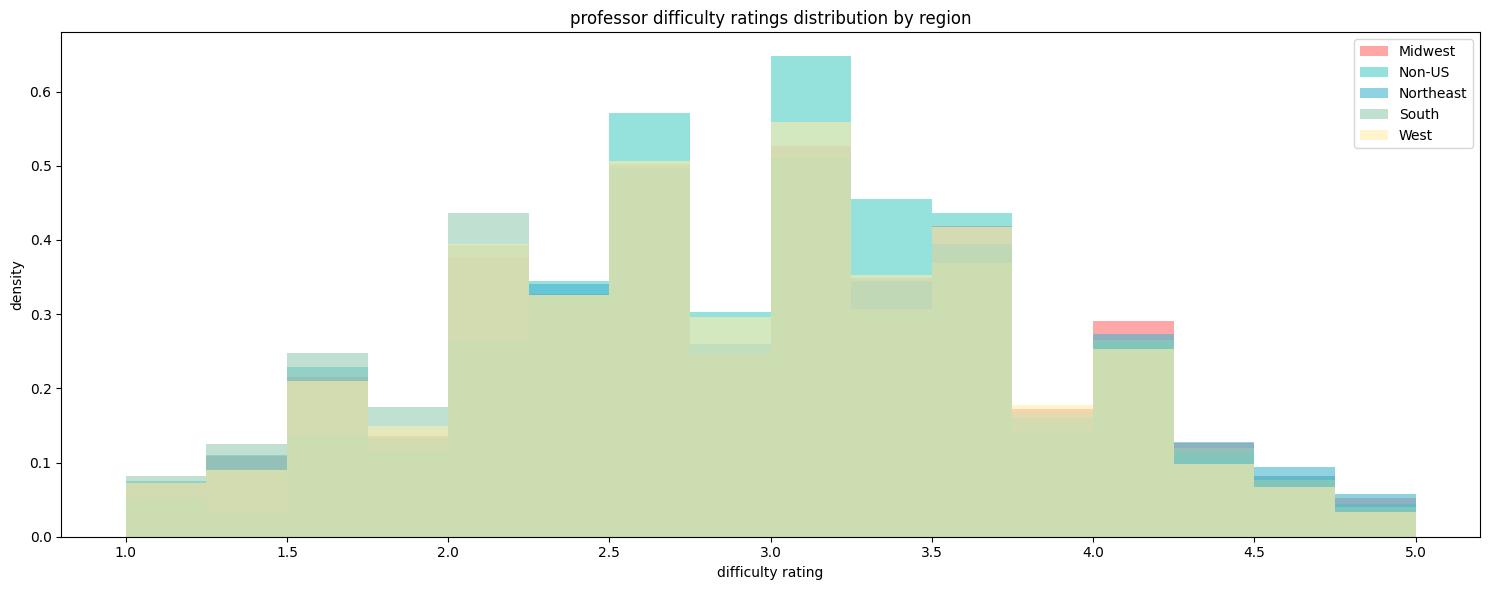

In [ ]:
# extra credit preprocessing
# categorize states into regions declared by the census bureau
census_regions = {
    'Northeast': ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA'],
    'Midwest': ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS'],
    'South': ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX'],
    'West': ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']
}

# place professers into their coresponding regions
def get_region(state):
    if pd.isna(state):
        return 'null'
    for region, states in census_regions.items():
        if state in states:
            return region
    return 'Non-US'  # any professors with no valid states is out of country

df_ec['region'] = df_ec['state'].apply(get_region)


# comparing avg_difficulty
regions = df_ec['region'].unique()
difficulty_by_region = [df_ec[df_ec['region'] == region]['avg_difficulty'] for region in regions]

# kw
h_stat, p_value = stats.kruskal(*difficulty_by_region)

print("\nkw h-test results:")
print(f"h-statistic: {h_stat}")
print(f"p-value: {p_value}")

median_difficulties = df_ec.groupby('region')['avg_difficulty'].median()
print("\nmedian difficulty by region:")
print(median_difficulties)

region_sizes = df_ec['region'].value_counts()
print("\nsample size by region:")
print(region_sizes)

plt.figure(figsize=(15, 6))
bins = np.arange(1, 5.1, 0.25)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']

for region, color in zip(sorted(df_ec['region'].unique()), colors):
    region_difficulties = df_ec[df_ec['region'] == region]['avg_difficulty']
    plt.hist(region_difficulties, bins=bins, density=True, alpha=0.6,
             label=region, histtype='stepfilled', color=color)

plt.title('professor difficulty ratings distribution by region')
plt.xlabel('difficulty rating')
plt.ylabel('density')
plt.legend()
plt.tight_layout()
plt.show()